In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.linear_model

# importons les données du titanic
df_brut = pd.read_csv('./titanic.csv')

# fonctions pour avoir un aperçu des donneésd
print(df_brut.info())
print(df_brut.describe())
df_brut.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   object 
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   object 
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 143.3+ KB
None
            pclass     survived        sibsp        parch        body
count  1309.000000  1309.000000  1309.000000  1309.000000  121.000000
mean      2.294882     0.381971     0.498854

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,"0,9167",1,2,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,"26,5500",E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,"77,9583",D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,"0,0000",A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,"51,4792",C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,"49,5042",NaN,C,NaN,22.0,"Montevideo, Uruguay"


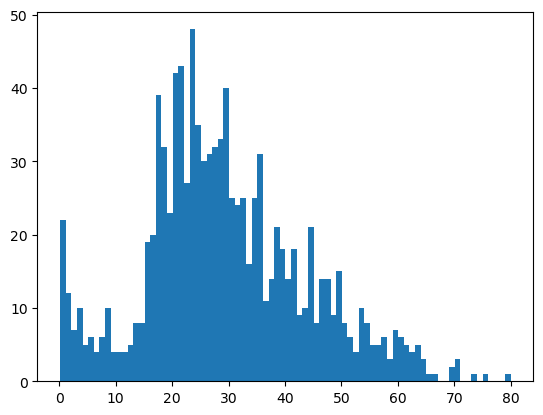

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
embarked    2
dtype: int64

In [2]:
# maintenant on va nettoyer les données.
df = df_brut.copy()
# cabin, boat. body et home.dest sont trop parcellaires pour ne pas polluer notre modèle
df.drop(['cabin', 'boat', 'body', 'home.dest'], axis=1, inplace=True)

# enlevons le nom, le prix et le numero de ticket aussi, car ces données sont trop complexes et pas si pertinentes
df.drop(['name', 'ticket', 'fare'], axis=1, inplace=True)

# afficher une pyramide des ages
df['age'] =  df['age'].str.replace(',','.') # mon dataset a des virgules de ses morts HAHA LE JOKAIRE
df['age'] =  pd.to_numeric(df['age'])
plt.hist(df.age, 80)
plt.show()
# maintenant on va placer la valeur moyenne de l’age à la place des valeurs manquantes
df['age'] = df['age'].fillna(df['age'].mean())

df.isnull().sum() # vérifier ou il reste des valeurs manquantes



In [3]:
#Pour embarked, on voir que la répartition est très assymetrique
print(df['embarked'].value_counts(dropna=False))

df_class = df.groupby('embarked')
print(df_class['pclass'].value_counts())
# il est difficile de voir une relation entre le quai d’embarquement et la classe des passagers.
# completons à 'S'
df['embarked'] = df['embarked'].fillna('S')

# sur les données qui restent, combien de personnes ont survécu ?
df[df['survived'] == 1].shape[0] / df.shape[0]


S      914
C      270
Q      123
NaN      2
Name: embarked, dtype: int64
embarked  pclass
C         1         141
          3         101
          2          28
Q         3         113
          2           7
          1           3
S         3         495
          2         242
          1         177
Name: pclass, dtype: int64


0.3819709702062643

In [4]:
# séparation du sexe et du quai d’embarquement
df = pd.get_dummies(df, columns=['sex', 'embarked'])
print(df.head(15))


    pclass  survived      age  sibsp  parch  sex_female  sex_male  embarked_C  \
0        1         1  29.0000      0      0           1         0           0   
1        1         1   0.9167      1      2           0         1           0   
2        1         0   2.0000      1      2           1         0           0   
3        1         0  30.0000      1      2           0         1           0   
4        1         0  25.0000      1      2           1         0           0   
5        1         1  48.0000      0      0           0         1           0   
6        1         1  63.0000      1      0           1         0           0   
7        1         0  39.0000      0      0           0         1           0   
8        1         1  53.0000      2      0           1         0           0   
9        1         0  71.0000      0      0           0         1           1   
10       1         0  47.0000      1      0           0         1           1   
11       1         1  18.000

In [9]:
# utilisation d’un modèle de classification.

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

xtrain, xtest, ytrain, ytest = train_test_split(df.drop('survived', axis=1), df['survived'], test_size=0.25)

# Normaliser les données entre 0 et 1
scaler = MinMaxScaler()
X_train = scaler.fit_transform(xtrain)
X_test = scaler.transform(xtest)

print(X_train)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, ytrain)
model.score(X_train, ytrain)

[[1.         0.21085562 0.125      ... 1.         0.         0.        ]
 [1.         0.0229641  0.375      ... 0.         0.         1.        ]
 [1.         0.43632544 0.         ... 0.         1.         0.        ]
 ...
 [0.         0.13569901 0.125      ... 0.         0.         1.        ]
 [1.         0.28601223 0.         ... 0.         0.         1.        ]
 [0.         0.56784951 0.         ... 0.         0.         1.        ]]


0.7828746177370031

In [11]:
# prédire les valeurs sur le jeu de test

scores = cross_validate(model, X_train, ytrain, cv=5, scoring="accuracy")
print(scores)

{'fit_time': array([0.02082038, 0.00803924, 0.00900054, 0.0095892 , 0.00952506]), 'score_time': array([0.00096917, 0.00200009, 0.00099969, 0.00200057, 0.00299764]), 'test_score': array([0.8071066 , 0.81632653, 0.70918367, 0.81632653, 0.77040816])}
